<a href="https://colab.research.google.com/github/TANKIANAUN/Learning/blob/master/CNN_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

In [0]:
# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 20

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

In [8]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
x_train.shape


(60000, 28, 28)

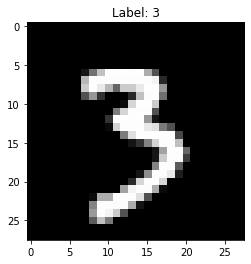

In [10]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')  #grey=1 , rgb=3 for channel
plt.title('Label: %d' % y_test[index])
plt.show()

In [11]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)   #for each sample 
    
x_train, x_test = x_train / 255.0, x_test / 255.0     #to make it float point, between 0 and 1

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


use 
reshape(x_test,shape=(1,row,column )) or reshape(num_sample,channel,row,column)

In [12]:
x_train.shape


(60000, 28, 28, 1)

In [37]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape)) #input shape=channel,row,column
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [45]:
#train model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))  #verbose -information to show 


Epoch 1/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0262 - val_accuracy: 0.9937
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.0302 - val_accuracy: 0.9932
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.0322 - val_accuracy: 0.9926
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0113 - accuracy: 0.9960 - val_loss: 0.0283 - val_accuracy: 0.9940
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0316 - val_accuracy: 0.9936
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0128 - accuracy: 0.9957 - val_loss: 0.0332 - val_accuracy: 0.9927
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0097 - accuracy: 0.9964 - val_loss: 0.0365 - val_accuracy: 0.9935
Epoch 

Test loss: 0.03510985150933266
Test accuracy: 0.993399977684021


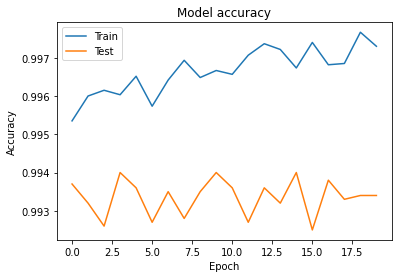

In [46]:
# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [0]:
#make prediction
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

In [0]:
#test randomly
index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

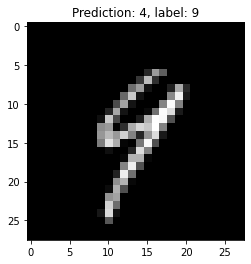

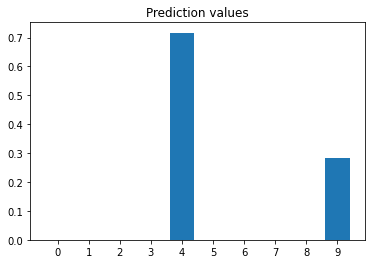

In [44]:
#plotting
for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()